# **Breast Cancer Classification Using Decision Tree and Random Forest Models**

**This project uses machine learning to help doctors detect breast cancer. The goal is to classify a tumor as either benign (non-cancerous) or malignant (cancerous) using computer models trained on real medical data**.

# We used two popular machine learning models:

>>**Decision Tree**

>>**Random Forest**

# **Importing essential libraries**

In [26]:
# For handling data in tabular format (loading, cleaning, manipulating)
import pandas as pd

# For creating statistical graphics and visualizations
import seaborn as sns

# For creating plots like bar charts, ROC curves, heatmaps, etc.
import matplotlib.pyplot as plt

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# For creating and training a Random Forest classifier (ensemble of decision trees)
from sklearn.ensemble import RandomForestClassifier

# For creating and training a single Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# For evaluating model performance using accuracy, reports, and metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc

# For scaling/normalizing features to improve model performance
from sklearn.preprocessing import StandardScaler


# **Load and Inspect Dataset**

In [3]:
df = pd.read_csv('/content/wisc_bc_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [4]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810
568,9012795,M,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,...,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.40240,0.19660,0.2730,0.08666


In [5]:
df.shape

(569, 32)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [8]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
points_mean,0


# **Data Cleaning**

In [9]:
# Drop ID column and handle missing values (if any)
df.drop(['id'], axis=1, inplace=True)
df.dropna(inplace=True)

In [10]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


# Label Encoding

In [11]:
# Encode diagnosis column: B -> 0 (Benign), M -> 1 (Malignant)
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Feature and Target Split

In [12]:
# Split features and labels
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


# Data Standardization

In [13]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train/test split

In [14]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Random Forest Model Training and Evaluation

In [15]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate and Compare Models
print("Random Forest Results")
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", rf_acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))



Random Forest Results
Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97        74
           1       0.91      0.97      0.94        40

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



# Decision Tree Model Training and Evaluation

In [19]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\nDecision Tree Results")
dt_acc = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", dt_acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Results
Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        74
           1       0.95      0.93      0.94        40

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Confusion Matrices for Random Forest and Decision Tree Models

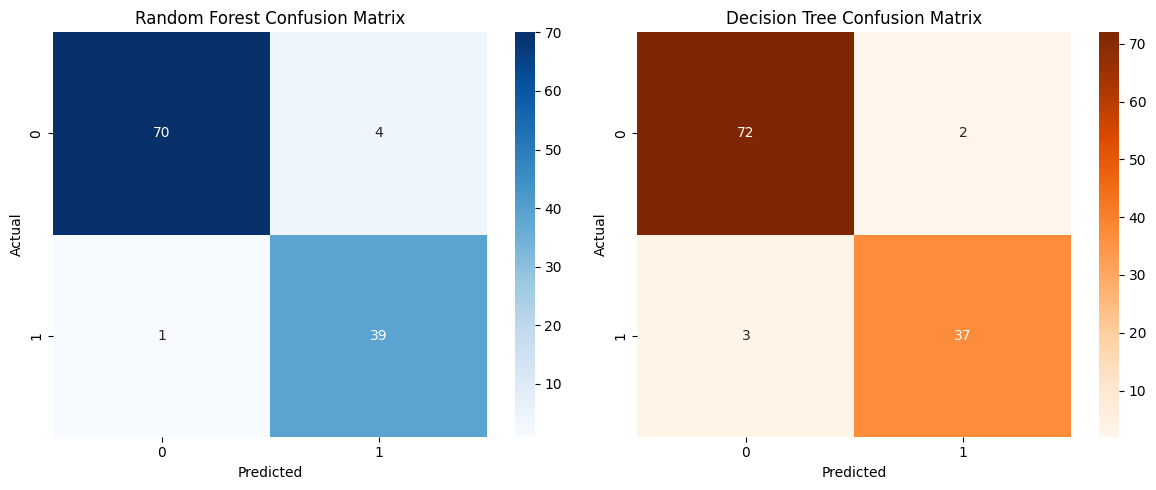

In [20]:
# Confusion Matrices
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC Curve Comparison

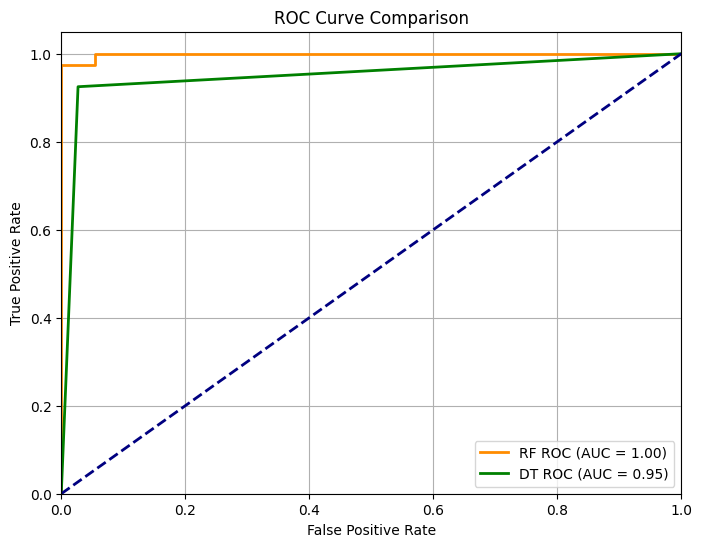

In [21]:
# ROC Curves
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='RF ROC (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='DT ROC (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Feature Importance and Model Performance Comparison

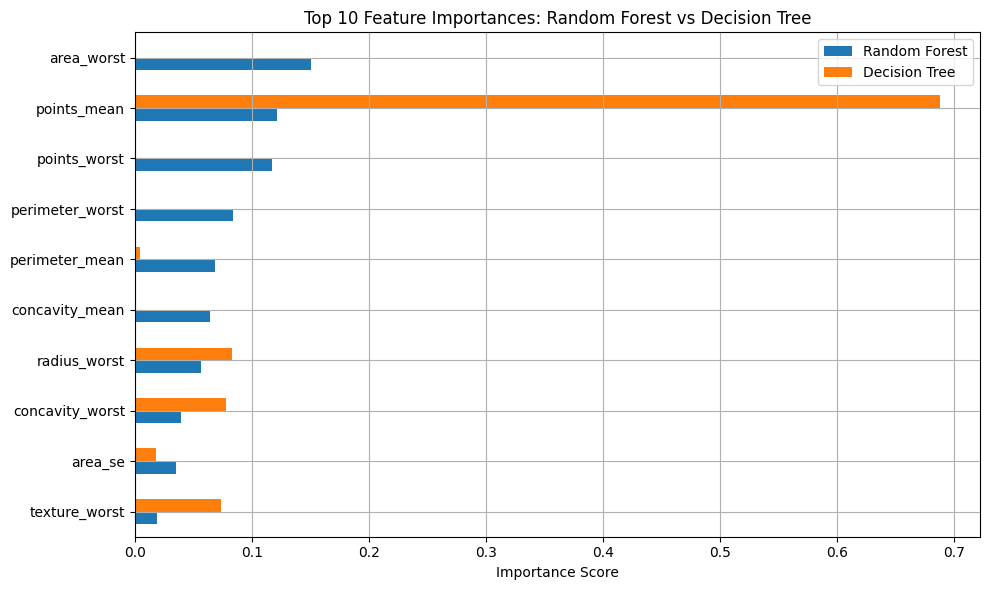


Model Accuracy Comparison:
Random Forest Accuracy: 0.9561
Decision Tree Accuracy: 0.9561

Model AUC Comparison:
Random Forest AUC: 0.9986
Decision Tree AUC: 0.9490


In [22]:
# Feature Importances Comparison
importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
importances_dt = pd.Series(dt_model.feature_importances_, index=X.columns)

# Combine into a single DataFrame
feature_compare = pd.DataFrame({
    'Random Forest': importances_rf,
    'Decision Tree': importances_dt
})

# Get top 10 features by average importance
top_features = feature_compare.mean(axis=1).nlargest(10).index

feature_compare.loc[top_features].sort_values("Random Forest").plot(kind='barh', figsize=(10, 6))
plt.title("Top 10 Feature Importances: Random Forest vs Decision Tree")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary Comparison
print("\nModel Accuracy Comparison:")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"Decision Tree Accuracy: {dt_acc:.4f}")

print("\nModel AUC Comparison:")
print(f"Random Forest AUC: {roc_auc_rf:.4f}")
print(f"Decision Tree AUC: {roc_auc_dt:.4f}")



# **Conclusion**

# This project successfully explored the application of Decision Tree and Random Forest models for breast cancer classification. Both models demonstrated strong predictive capabilities on the Wisconsin Breast Cancer dataset.
